<font size="7" color="#0000ff"><center>Titanic - Abschlussprojekt </center></font>

<font size="5" color="#0000ff"><center>Gruppe B (15-18 Februar 2022)</center></font>
<font size="3" color="#0000ff"><center>Mohanad Abdaldayem, Sinan Hinislioglu, Tat Dat Tran</center></font>

<img src="titanic.jpg" width=100%>

# Einführung

Der Untergang der Titanic ist eines der berüchtigtsten Schiffswracks der Geschichte.

Am 15. April 1912, während ihrer Jungfernfahrt, sank die RMS Titanic, die weithin als „unsinkbar“ galt, nachdem sie mit einem Eisberg kollidierte. Leider waren nicht genügend Rettungsboote für alle an Bord, was zum Tod von 1502 von 2224 Passagieren und Besatzungsmitgliedern führte.

Obwohl das Überleben ein Glückselement war, scheint es, dass einige Gruppen von Menschen mit größerer Wahrscheinlichkeit überleben als andere.

In diesem Projekt erstellen wir ein Vorhersagemodell, um das Überleben von Titanic-Passagieren vorherzusagen. Dies würde dann die Frage beantworten: "Welche Art von Menschen würde eher überleben?", oder genauer gesagt, "wenn Frauen und Kinder eher überleben würden?".

<b>Referenz:<b> 

- https://www.kaggle.com/c/titanic <br>
- https://www.kaggle.com/pavlofesenko/titanic-extended?select=full.csv <br>
- https://en.wikipedia.org/wiki/Passengers_of_the_Titanic <br>
- https://www.kaggle.com/alexisbcook/titanic-tutorial <br>
- Material von dem Kurs
- google
    



# Datensammlung

## Bibliothek

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import statistics

from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import GaussianNB

# We are importing WARNINGS class to suppress warnings
import warnings
warnings.filterwarnings('ignore')

## Daten importieren

In [2]:
# Daten importieren von https://www.kaggle.com/pavlofesenko/titanic-extended?select=full.csv
df = pd.read_csv("train.csv")
df_test =  pd.read_csv("test.csv")

## Datenrecherche und Entfernung unwichtiger und doppelter Daten 

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 21 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    float64
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
 12  WikiId       889 non-null    float64
 13  Name_wiki    889 non-null    object 
 14  Age_wiki     887 non-null    float64
 15  Hometown     889 non-null    object 
 16  Boarded      889 non-null    object 
 17  Destination  889 non-null    object 
 18  Lifeboat     345 non-null    object 
 19  Body    

In [4]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 20 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
 11  WikiId       415 non-null    float64
 12  Name_wiki    415 non-null    object 
 13  Age_wiki     415 non-null    float64
 14  Hometown     415 non-null    object 
 15  Boarded      415 non-null    object 
 16  Destination  415 non-null    object 
 17  Lifeboat     157 non-null    object 
 18  Body         43 non-null     object 
 19  Class   

In [5]:
df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,Embarked,WikiId,Name_wiki,Age_wiki,Hometown,Boarded,Destination,Lifeboat,Body,Class
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,...,S,691.0,"Braund, Mr. Owen Harris",22.0,"Bridgerule, Devon, England",Southampton,"Qu'Appelle Valley, Saskatchewan, Canada",NaN,NaN,3.0
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,...,C,90.0,"Cumings, Mrs. Florence Briggs (née Thayer)",35.0,"New York, New York, US",Cherbourg,"New York, New York, US",4,NaN,1.0
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,...,S,865.0,"Heikkinen, Miss Laina",26.0,"Jyväskylä, Finland",Southampton,New York City,14?,NaN,3.0
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,...,S,127.0,"Futrelle, Mrs. Lily May (née Peel)",35.0,"Scituate, Massachusetts, US",Southampton,"Scituate, Massachusetts, US",D,NaN,1.0
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,...,S,627.0,"Allen, Mr. William Henry",35.0,"Birmingham, West Midlands, England",Southampton,New York City,NaN,NaN,3.0


In [6]:
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,WikiId,Name_wiki,Age_wiki,Hometown,Boarded,Destination,Lifeboat,Body,Class
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,928.0,"Kelly, Mr. James",19.0,"Unknown, Ireland",Southampton,New York City,NaN,70MB,3.0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,1297.0,"Wilkes, Mrs. Ellen",47.0,"Penzance, Cornwall, England",Southampton,"Akron, Ohio, US",16,NaN,3.0
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,518.0,"Myles, Mr. Thomas Francis",63.0,"Fermoy, Ireland[note 1]",Queenstown,"Waban, Massachusetts, US",NaN,NaN,2.0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,1303.0,"Wirz, Mr. Albert",27.0,"Uster, Switzerland",Southampton,"Beloit, Wisconsin, US",NaN,131MB,3.0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,871.0,"Hirvonen, Mrs. Helga Elisabeth (née Lindqvist)",22.0,"Taalintehdas, Finland",Southampton,"Monessen, Pennsylvania, US",15,NaN,3.0


In [7]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,WikiId,Age_wiki,Class
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000,889.000000,887.000000,889.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208,665.466817,29.322063,2.307087
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429,380.796997,13.930089,0.837713
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000,1.000000,0.420000,1.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400,336.000000,20.000000,2.000000
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200,672.000000,28.000000,3.000000
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000,996.000000,38.000000,3.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200,1314.000000,74.000000,3.000000


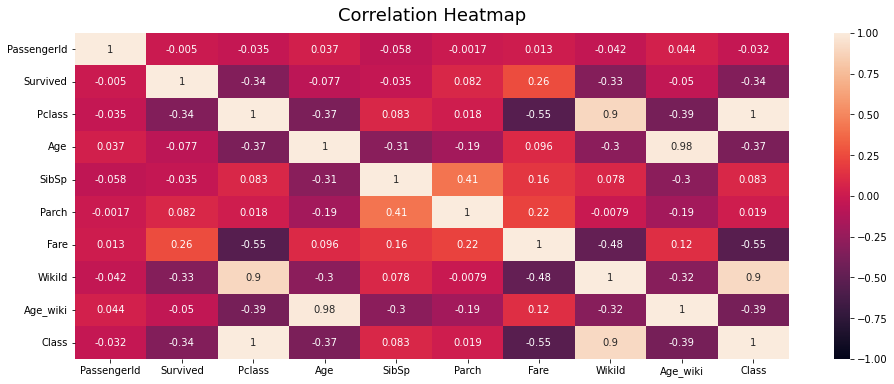

In [8]:
plt.figure(figsize=(16, 6))
heatmap = sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':18}, pad=12);

An dieser Stelle ist es wichtig, wie viele Variablen und Werte unsere Datensätze haben, um welche Art von Variablen es sich handelt und welche davon fehlende Werte haben.

Wir können sehen, dass beide Datensätze 19 erklärende Variablen haben. Der df_test-Datensatz enthält etwa 30 % aller Beobachtungen, sodass die Proportionen der Train- und Testdatensätze in Ordnung sind. Die entsprechenden Variablen haben die gleichen Typen, sodass es keine Probleme mit möglichen Variablentransformationen gibt. Das gemeinsame Merkmal beider Sätze ist die große Anzahl von Lücken in den Variablen Age und Cabin, während die verbleibenden Variablen einzelne fehlende Beobachtungen aufweisen, die im zweiten Satz nicht unbedingt vorhanden sind.

<b>Diskutieren:<b>

- Unwichtig Spalten: WikiId, Hometown, Destination, Lifeboat, Body
- Duplikate Spalten: Name_wiki = Name, Age_wiki = Age, Boarded = Embarked, Class = Pclass

<b>Spalten Erklären<b>

PassengerId: eindeutige ID-Nummer für jeden Passagier

Survived: Passagier überlebt(1) oder ist gestorben(0)

Pclass: Passagierklasse

Name: Name

Sex: Geschlecht des Passagiers

Age: Alter des Passagiers

SibSp: Anzahl der Geschwister/Ehepartner

Parch: Anzahl der Eltern/Kinder

Ticket: Ticketnummer

Fare: Geldbetrag, der für das Ticket ausgegeben wird

Cabin: Kabinenkategorie

Embarked : Hafen, in dem die Passagiere eingeschifft wurden (C = Cherbourg, Q = Queenstown, S = Southampton)

In [9]:
df = df.drop(['WikiId', 'Name_wiki','Age_wiki', 'Hometown', 'Boarded', 'Destination', 'Lifeboat', 'Body',
'Class'], axis=1)
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0.0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1.0,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0.0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1.0,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    float64
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(3), int64(4), object(5)
memory usage: 83.7+ KB


In [11]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [12]:
df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


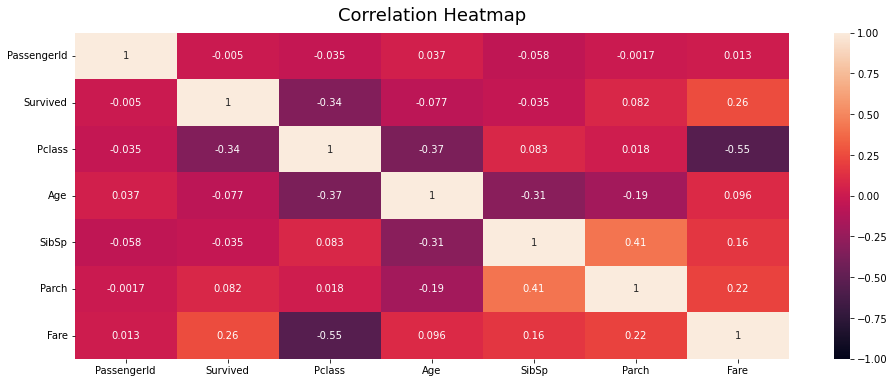

In [13]:
plt.figure(figsize=(16, 6))
heatmap = sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':18}, pad=12);

Um die erstellten Modelle zu überprüfen und zu überprüfen, ob es keine Modellüberanpassung gibt, weisen wir 20 % des Zugsets dem Validierungsset zu, was ungefähr 10 % aller Passagiere der Titanic entspricht. Wir verwenden einen stratifizierten Shuffle-Split, der ähnliche Proportionen in beiden Sets ermöglicht. Die Proportionen basieren auf dem Geschlecht, nach dem Prinzip „Frauen und Kinder zuerst“. Auf diese Weise wird beispielsweise vermieden, dass in einem der Datensätze die überwiegende Mehrheit aus Männern besteht, die sicherlich weniger Überlebenschancen hatten (die Aufteilung nach Alter wäre aufgrund der Vielzahl von Werten zu kompliziert und die Notwendigkeit, das Kindheitsalter zu definieren).

In [14]:
from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, valid_index in split.split(df, df['Sex']):
    df_train = df.loc[train_index]
    df_valid = df.loc[valid_index]

df_train = df_train.reset_index(drop=True)

# Explorative Datenanalyse und Feature-Engineering

In [15]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 712 entries, 0 to 711
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  712 non-null    int64  
 1   Survived     712 non-null    float64
 2   Pclass       712 non-null    int64  
 3   Name         712 non-null    object 
 4   Sex          712 non-null    object 
 5   Age          578 non-null    float64
 6   SibSp        712 non-null    int64  
 7   Parch        712 non-null    int64  
 8   Ticket       712 non-null    object 
 9   Fare         712 non-null    float64
 10  Cabin        164 non-null    object 
 11  Embarked     710 non-null    object 
dtypes: float64(3), int64(4), object(5)
memory usage: 66.9+ KB


## PassengerId

In diesem Fall gibt es nicht viel zu analysieren. PassengerId ist einfach die Position des Passagiers im Datensatz und, wie wir annehmen, zufällig. Diese Variable muss einfach verworfen und beim Erstellen von Modellen nicht berücksichtigt werden.

## Survived

Response variable in unserem Datensatz. Ihre Beziehung zu den anderen Variablen wird bei der Untersuchung der anderen Variablen überprüft, aber an dieser Stelle wird es interessant sein, die Überlebensrate der gesamten Passagiere zu zeigen.

Text(0.5, 1.0, 'Titanic survivors')

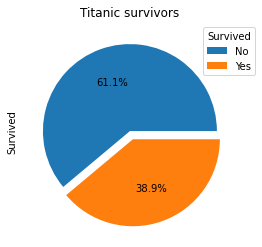

In [16]:
df_train['Survived'].value_counts().plot(kind='pie', labels=None, explode=[0,0.1],autopct='%1.1f%%')
plt.legend(['No','Yes'], title="Survived", loc='upper right', bbox_to_anchor=(1.1,1))
plt.title("Titanic survivors")

Wie wir aus der Grafik ersehen können, überlebten die meisten Passagiere aus der Trainingskollektion die Katastrophe nicht (fast zwei Drittel von ihnen). Die Frage ist, welchen Einfluss die Variablen im Modell auf die Überlebensrate haben.

## Pclass

Auf der Titanic gab es 3 Reiseklassen: dritte (niedrigster Standard), zweite und erste (höchster Standard). Das folgende Diagramm zeigt ihre Beziehung zur Survived-Variablen.

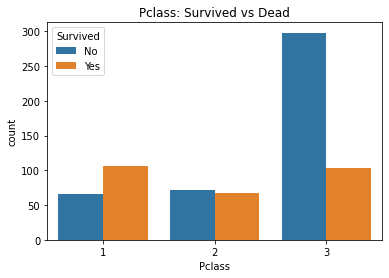

In [17]:
sns.countplot('Pclass',hue='Survived',data=df_train)
plt.legend(['No','Yes'], title="Survived")
plt.title("Pclass: Survived vs Dead")
plt.show()

Aus der obigen Grafik lassen sich zwei wichtige Botschaften ablesen:

- Die am häufigsten gewählte Klasse war die niedrigste Klasse, während in der zweiten und dritten Klasse die Anzahl der Passagiere ähnlich war.
- Die dritte Klasse hat die niedrigste Überlebensfähigkeit, während die erste Klasse die höchste Überlebensfähigkeit hat (die zweite Klasse ist ungefähr zur Hälfte geteilt).
Fragen wir nun unsere Passagiere, wie sie heißen.

## Name

Es scheint, dass in diesem Fall die Dinge denen von PassengerId ähnlich sind. Die Verwendung von Namen macht wenig Sinn, bei null Interpretierbarkeit. Für jeden Passagier haben wir aber neben dem Vor- und Nachnamen auch einen Titel. Es wäre interessant, es zu extrahieren und zu untersuchen, wie es mit dem Überleben zusammenhängt.

In [18]:
Title = list()
for i in range(0, len(df_train['Name'])):
    Title.append(((df_train['Name'][i].rsplit(',', 1)[1]).rsplit('.', 1)[0]).strip())

pd.crosstab([Title], df_train['Survived'], rownames=['Title'])

Survived,0.0,1.0
Title,,
Capt,1,0
Col,1,1
Don,1,0
Dr,3,3
Jonkheer,1,0
Lady,0,1
Major,1,1
Master,13,16
Miss,41,104


Es erscheint vernünftig, die beliebtesten Titel (Master, Miss, Mr, Mrs) zu belassen und den Rest zu einem zu kombinieren. Es kann durchaus zu Datenfehlern kommen (z. B. alle Personen mit Rev-Titeln haben überlebt, und Personen mit Dr-Titeln halbiert), aber Einzelwerte werden beim späteren One-Hot Encoding problematisch (die Variablen werden zu monoton und damit ungeeignet für das Model).

In [19]:
Title = ['Other' if x!='Mr' and x!='Mrs' and x!='Master' and x!='Miss' else x for x in Title]
pd.crosstab([Title], df_train['Survived'], rownames=['Title'])

Survived,0.0,1.0
Title,,
Master,13,16
Miss,41,104
Mr,348,67
Mrs,21,79
Other,12,11


Es scheint viel klarer zu sein, eine Kreuztabelle anstelle eines Diagramms zu verwenden. Einige wenige Werte enthalten fast alle Titel, sodass das Diagramm zu unleserlich wäre.

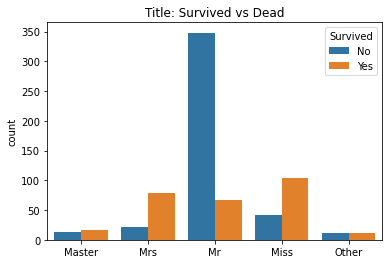

In [20]:
Title = pd.Series(Title)
sns.countplot(Title,hue='Survived',data=df_train)
plt.legend(['No','Yes'], title="Survived")
plt.title("Title: Survived vs Dead")
plt.show()

- Mrs:  eine geheiratete Frau
- Mr:  ein Mann
- Miss: eine ledige Frau
- Master: ein Jung

Aus Grafik und Tabelle lassen sich folgende Schlüsse ziehen:

- überwiegende Mehrheit der Passagiere sind reife Männer.

- Es waren mehr unverheiratete Frauen an Bord als verheiratete Frauen.

- Es gab relativ wenige junge Männer und Personen mit ungewöhnlichen Titeln (einschließlich Besatzungsmitglieder).

- Reife Männer haben die niedrigste Überlebensfähigkeit (16,1 %)

- Unverheiratete Frauen haben eine etwas höhere Überlebensrate (Fräulein: 28,3 %, Frau: 21 %).

- Das Überleben junger Männer und solcher mit seltenen Titeln liegt bei etwa 50 % (Meister: 55,2 %, Andere: 47,8 %).

Aus Punkt 5 scheint eine interessante Schlussfolgerung gezogen zu werden: Hat ein Ehemann wirklich die Überlebenschancen verringert?

Miss:

In [21]:
np.nanmean(df_train['Age'].loc[Title[Title == 'Miss'].index])

21.56637168141593

Mrs:

In [22]:
np.nanmean(df_train['Age'].loc[Title[Title == 'Mrs'].index])

34.98823529411764

Das Durchschnittsalter für Frauen mit dem Titel „Miss“ ist viel niedriger als für Frauen mit dem Titel „Mrs“. Dies könnte ein Grund dafür sein, dass die erstgenannte Gruppe nach dem „Women and children first“-Prinzip eine etwas bessere Überlebensrate aufweist und junge Frauen bevorzugt.

## Sex

Die Schlussfolgerungen dieser Variablen überschneiden sich wahrscheinlich mit denen der Titel. Es kann jedoch hilfreich sein, beide Variablen (Titel und Geschlecht) beizubehalten, da die Titelvariable nicht so tief in seltene Titel eindringt und die Geschlechtsvariable einen allgemeineren Überblick über Titanic-Passagiere gibt, was in einigen Fällen nützlicher sein kann .

Das folgende Diagramm zeigt die Verteilung der Passagiere nach Geschlecht und Überleben.

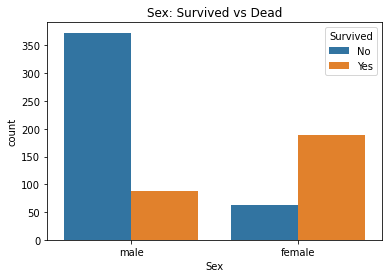

In [23]:
sns.countplot('Sex',hue='Survived',data=df_train)
plt.legend(['No','Yes'], title="Survived")
plt.title("Sex: Survived vs Dead")
plt.show()

Tatsächlich zieht die Geschlechtsvariable ähnliche Schlussfolgerungen wie der Titel, jedoch in einem allgemeineren Sinne:

- Es waren mehr Männer an Bord als alle Frauen insgesamt
- Die Gesamtüberlebensrate der Männer (19,1 %) ist viel niedriger als die Gesamtüberlebensrate der Frauen (75,3 %).

Es ist auch eine gute Idee, den Zusammenhang zwischen Geschlecht und Klassenzugehörigkeit zu überprüfen. Es ist möglich, dass die höhere Überlebensrate von Frauen nur auf eine oder zwei Klassen zurückzuführen ist, obwohl dies angesichts eines so großen Vorteils in der Gesamtüberlebensrate zweifelhaft ist.

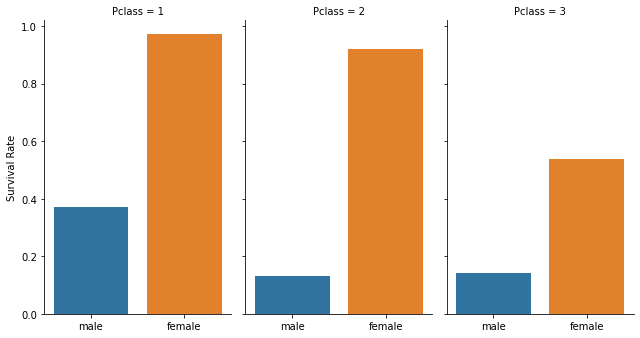

In [24]:
plot = sns.catplot(x="Sex", y="Survived", col="Pclass", data=df_train, kind="bar", ci=None, aspect=.6)
plot.set_axis_labels("", "Survival Rate")

"Frauen und Kinder zuerst. Die reichsten Männer an zweiter Stelle"

Es gibt keine Klasse, in der das Überleben der Männer dem der Frauen ein wenig näher gekommen ist. Der kleinste Unterschied liegt in der ersten Klasse, die recht intuitiv ist. Die folgenden Dinge sind auch interessant und nicht so offensichtlich:

Bei Frauen liegt der größte Sprung in der Überlebensrate bereits zwischen der dritten und zweiten Klasse
Bei Männern tritt der größte Sprung in der Überlebensrate zwischen der zweiten und der ersten Klasse auf, zwischen der dritten und der zweiten Klasse ist sogar ein leichter Rückgang zu verzeichnen
Lassen Sie uns weitermachen und nach interessanteren Beziehungen suchen, diesmal in das Privatleben der Titanic-Passagiere eintreten.

## SibSp

Die Variable SibSp bedeutet die Anzahl der Geschwister/Ehepartner an Bord der Titanic. Einerseits kann eine größere Anzahl an Geschwistern oder die Anwesenheit eines Ehepartners (oder beides gleichzeitig) an Bord dazu beitragen, die Überlebenschancen zu verbessern, da wir mit einer größeren Unterstützung durch die Angehörigen rechnen können. Andererseits könnte die große Anzahl dieser Familienmitglieder eine effektive Evakuierung aufgrund der Streuung von Familienmitgliedern über das Deck behindert und Einwände erhoben haben, wenn das Rettungsboot fast ausschließlich von einer Familie besetzt war.

Die daraus resultierenden Zweifel können sicherlich durch ein altes, zuverlässiges Zähldiagramm ausgeräumt werden.

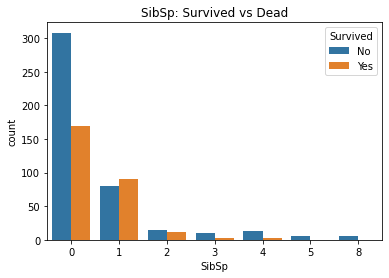

In [25]:
sns.countplot('SibSp',hue='Survived',data=df_train)
plt.legend(['No','Yes'], title="Survived", loc="upper right")
plt.title("SibSp: Survived vs Dead")
plt.show()

Tatsächlich ist es aufgrund des großen Vorteils der Werte 0 und 1 besser, sich für eine bessere Lesbarkeit auf die Tabelle zu konzentrieren.

In [26]:
pd.crosstab(df_train['Survived'], df_train['SibSp'])

SibSp,0,1,2,3,4,5,8
Survived,,,,,,,
0.0,308,80,14,10,13,5,5
1.0,169,91,11,3,3,0,0


Es ist festzustellen, dass anhand der SibSp-Variablen drei charakteristische Klassen unterschieden werden können:

- Personen ohne Geschwister und Ehepartner an Bord (Überlebensrate: 35,4 %).

- Personen mit Ehepartner oder Geschwister an Bord (Überlebensrate: 53,2 %).

- Menschen mit einer höheren Gesamtzahl dieser Verwandten (Überlebensrate: 26,6 %).

Aufgrund der höheren Überlebensrate als bei den Gruppen mit den Werten 3, 4, 5 und 8 mag es fragwürdig erscheinen, der dritten Gruppe einen Wert von 2 hinzuzufügen. Das Ergebnis für diesen Wert (44 %) überzeichnet das Ergebnis für die gesamte Gruppe deutlich (15,4 % ohne Wert 2). Allerdings sollte man auf die Anzahl der Beobachtungen achten, die deutlich näher an den Werten 3, 4, 5 und 8 liegt als an den Werten 0 oder 1. Gruppe mit Wert 2 hat auch mehr Todesfälle als Überlebende, was bei a nicht der Fall ist Gruppe mit dem Wert 1. Aus diesem Grund ist es meines Erachtens sicherer, die Zahl 2 der letzten Gruppe zuzuordnen und keine eigene Gruppe für die Zahl 2 selbst zu erstellen, die die Variable in zu viele Gruppen aufteilen könnte.

Im obigen Absatz habe wir uns ausführlich mit der Unterteilung bezüglich der SibSp-Variablen befasst, da es sich als gute Idee herausstellen kann, die Variable von numerisch auf kategorisch umzuwandeln, mit den oben angegebenen Kategorien. Wie das Diagramm und die Tabelle zeigten, ist die Beziehung zwischen der Überlebens- und der SibSp-Variable ziemlich kompliziert. Die beste Situation schien zu sein, nur einen Ehepartner oder ein Geschwister zu haben. Andererseits war es besser, ohne die genannten Angehörigen zu reisen, als zu viele von ihnen dabei zu haben.

## Parch

Die Variable Parch ist eine weitere Variable, die familiäre Verbindungen zwischen Titanic-Passagieren anzeigt. Es gibt die Anzahl der Eltern/Kinder an Bord an. Werden die Schlussfolgerungen dieser Variablen der Anzahl der Ehepartner/Geschwister ähnlich sein? Hat die Anwesenheit einer kleinen Anzahl von Eltern/Kindern die Überlebenschancen erhöht, aber es ist besser, ein einsamer Wolf zu sein, als mit einer großen Gruppe von Verwandten zu reisen? Bleiben Sie dran!

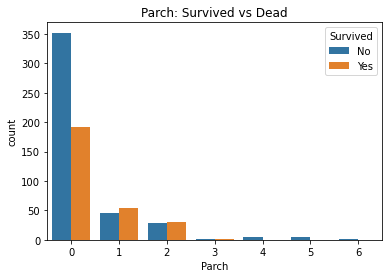

In [27]:
sns.countplot('Parch',hue='Survived',data=df_train)
plt.legend(['No','Yes'], title="Survived", loc="upper right")
plt.title("Parch: Survived vs Dead")
plt.show()

Lassen Sie uns zur besseren Lesbarkeit wieder die Tabelle verwenden

In [28]:
pd.crosstab(df_train['Survived'], df_train['Parch'])

Parch,0,1,2,3,4,5,6
Survived,,,,,,,
0.0,352,45,28,1,4,4,1
1.0,191,54,30,2,0,0,0


Aufgrund der obigen Erkenntnisse lassen sich auch drei charakteristische Klassen unterscheiden:

Personen ohne Eltern und Kinder an Bord (Überlebensrate: 35,2 %)
Personen mit einem/zwei Elternteilen/Kindern an Bord (Überlebensrate: 53,5 %)
Menschen mit einer höheren Gesamtzahl dieser Verwandten (Überlebensrate: 16,7 %)
Beide Fragen, die vor dem Zeichnen des Zähldiagramms gestellt wurden, können mit Ja beantwortet werden. Die Schlussfolgerungen sind ähnlich denen der SibSp-Variablen: Reisen ohne Eltern und Kinder ist sicherer als Reisen mit einer großen Gruppe, aber nicht so sicher wie Reisen mit nur 1-2 genannten Personen.

Wie wir sehen können, haben wir dieses Mal 1 und 2 Werte in einer Klasse kombiniert. Es gibt keinen so großen Unterschied in der Anzahl der Beobachtungen wie bei SibSp, und in beiden Fällen gibt es mehr Überleben als Tod. Auch die Überlebensfähigkeit ist sehr ähnlich (für Wert 1: 54,5 %, für Wert 2: 51,7 %).

## Family_members

Diese Variable befindet sich nicht im Datensatz. Die Variable Family_members ist nur eine Kombination aus SibSp und Parch. Da es einen Zusammenhang zwischen dem Überleben und der Anzahl der Ehepartner/Geschwister an Bord und der Anzahl der Eltern/Kinder an Bord gibt, warum nicht deren gemeinsame Auswirkungen untersuchen? Das Hindernis ist jedoch die Kollinearität, die auftritt, wenn beide Variablen SibSp, Parch und Family_members im Modell vorhanden sind. Es ist jedoch möglich, dass die Family_members-Variable neue Klassen erstellt, die nicht so einfach auf der Grundlage der Werte von SibSp- und Parch-Variablen berechnet werden können. Die einzige Möglichkeit, dies herauszufinden, besteht darin, eine Variable zu erstellen, also machen wir es.

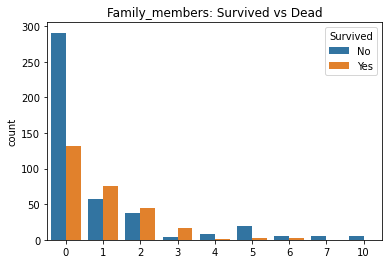

In [29]:
Family_members = df_train['SibSp'] + df_train['Parch']

sns.countplot(Family_members,hue='Survived',data=df_train)
plt.legend(['No','Yes'], title="Survived", loc="upper right")
plt.title("Family_members: Survived vs Dead")
plt.show()



Natürlich wird die Tabelle wieder nützlich sein.

In [30]:
pd.crosstab(df_train['Survived'], Family_members, colnames=['Family_members'])

Family_members,0,1,2,3,4,5,6,7,10
Survived,,,,,,,,,
0.0,291,58,38,4,8,19,6,6,5
1.0,132,76,45,17,1,3,3,0,0


Diesmal lassen sich nicht 3, sondern 4 Klassen per Kreuztabelle und Zählplot unterscheiden:

- Personen ohne Familienmitglieder an Bord (Überlebensrate: 31,2 %).

- Personen mit höchstens zwei Familienmitgliedern an Bord (Überlebensrate: 55,8 %).

- Personen mit drei Familienmitgliedern an Bord (Überlebensrate: 81 %).

- Personen mit mehr als drei Familienmitgliedern an Bord (Überlebensrate: 13,7 %).

Die Situation ist nicht allzu überraschend. Bis zu einem bestimmten Zeitpunkt erhöht die Erhöhung der Anzahl der mitreisenden Familienmitglieder die Überlebenschancen des Passagiers, ab dem Wert 3 ist jedoch eine deutliche Abnahme der Überlebensfähigkeit zu beobachten. Die Verwendung solcher ausgewählter Klassen verursacht kein Kollinearitätsproblem, da sie nicht auf einfachen arithmetischen Operationen basieren, sondern eine Codierung erfordern. Durch die Kodierung wird die Suche nach Ausreißern für Variablen von Familienmitgliedern vermieden, da alle Klassen mit einer größeren Anzahl in einem kategorialen Wert enthalten sind.

Aus der Geschichte wissen wir, dass in der Vergangenheit die größten Familien arm waren, wo die Vielzahl der Kinder die Chancen der Eltern auf eine friedliche Zukunft erhöhte. Die Sterblichkeitsrate war viel höher als heute und die Eltern wollten zumindest ein paar ihrer Nachkommen behalten. In Familien mit höherem sozialen Status, mit besseren Lebensbedingungen, waren kleinere Familien damit zufrieden, dass jedes der Kinder einen größeren Anteil am Vermögen der Eltern hatte. 

In [31]:
pd.crosstab(df_train['Survived'], [Family_members, df_train['Pclass']], colnames=['Family_members', 'Pclass'])

Family_members  0            1           2          3        4     5          \
Pclass           1   2    3   1   2   3   1   2   3  1  2  3  1  3  1  2   3   
Survived                                                                       
0.0             40  48  203  17  13  28   6   8  24  1  2  1  0  8  2  0  17   
1.0             45  29   58  41  16  19  14  13  18  3  8  6  1  0  2  1   0   

Family_members 6  7  10  
Pclass          3  3  3  
Survived                 
0.0             6  6  5  
1.0             3  0  0

Tatsächlich waren die zahlreichsten Familien in der dritten Klasse. Es gab ein paar Leute aus höheren Klassen mit einem Wert der Family_members-Variablen gleich 4 oder 5, aber für sie war das Gleichgewicht gnädiger. Darüber hinaus gibt es einige Abhängigkeiten, die auf den ersten Blick nicht sichtbar sind:

- Erstklassige Menschen haben nie eine Überlebensrate von weniger als 50 %, auch wenn sie keine Familie an Bord haben. Dennoch gibt es auch für sie Unterschiede im Überlebensverhältnis zur Variable Family_members
- Bei einem Family_members-Wert von 3, bei dem die Überlebensfähigkeit am höchsten war, hatte jede Klasse mehr Überlebende als Todesfälle. Dies ist der einzige Wert, bei dem die Überlebensfähigkeit von Passagieren der dritten Klasse 50 % überstieg.

Ein Familienunternehmen ist vorbei, also können wir uns dem Papierkram widmen.

## Ticket

Jeder hat eine Fahrkarte. Es waren also keine blinden Passagiere an Bord. Aber es gab Passagiere, die mit einem Ticket reisten. Wenn die Anwesenheit von Familienmitgliedern die Überlebensfähigkeit beeinträchtigen könnte, warum sollte sie dann nicht durch die Anwesenheit von Reisebegleitern beeinträchtigt werden, die nicht unbedingt Mitglieder der unmittelbaren Familie sind? Oder die Tatsache, dass wir mit der Familie fahren, aber auf getrennten Tickets?

Es reicht jedoch nicht aus, die Ähnlichkeit der Tickets anhand nur eines aktuellen Datensatzes zu prüfen. Es ist möglich, dass Reisebegleiter auf zwei Teildatensätze aufgeteilt wurden, sodass die erstellte Variable nicht zuverlässig ist. Zu diesem Zweck wird eine Ticketdatenbank aller Titanic-Passagiere erstellt, die genaue Berechnungen und Plots ermöglicht.

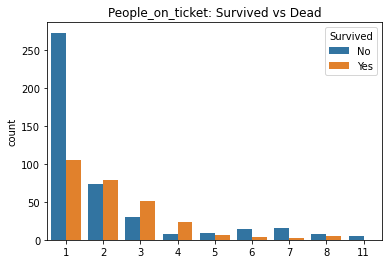

In [32]:
ticket_base = []
ticket_base.extend(df['Ticket'].tolist())
ticket_base.extend(df_test['Ticket'].tolist())

People_on_ticket = list()
tickets = list(df_train['Ticket'])
for i in tickets:
    People_on_ticket.append(ticket_base.count(i))
People_on_ticket = np.int64(People_on_ticket)

sns.countplot(People_on_ticket,hue='Survived',data=df_train)
plt.legend(['No','Yes'], title="Survived", loc="upper right")
plt.title("People_on_ticket: Survived vs Dead")
plt.show()

In [33]:
pd.crosstab(df_train['Survived'], People_on_ticket, colnames=['Ticket_counts'])

Ticket_counts,1,2,3,4,5,6,7,8,11
Survived,,,,,,,,,
0.0,273,73,30,7,9,14,16,8,5
1.0,105,79,51,24,6,4,3,5,0


Auch bei People_on_ticket gibt es eine gewisse Abhängigkeit in der Anzahl der Tickets mit einer gemeinsamen Nummer:

- Die meisten reisen mit ihrem eigenen Ticket. Ihre Überlebensrate ist niedrig (27,8 %).
- Personen, die mit 1-2 Personen auf einem Ticket reisen, haben eine durchschnittliche Überlebensrate (1 Person: 52 %, 2 Personen: 63 %)
- Personen, die mit 3 Personen auf einem Ticket reisen, haben eine hohe Überlebensrate (77,4 %).

- Andere Menschen haben niedrige oder sehr niedrige Überlebensraten (zusammen: 25,7 %).

Die Schlussfolgerungen sind ähnlich wie bei Familienvariablen: Es lohnt sich, mit wenigen Personen zu reisen, aber genug ist genug.

Da die Schlussfolgerungen mit denen für Familienvariablen identisch sind und die Buckets, in die die People_on_ticket-Variable unterteilt werden kann, mit denen für Family_members identisch sind, ist es möglich, dass zwischen diesen Variablen eine hohe Korrelation besteht.

In [34]:
np.corrcoef(Family_members, People_on_ticket)


array([[1.        , 0.81150939],
       [0.81150939, 1.        ]])

Tatsächlich ist die Korrelation hoch. Sicherlich lohnt es sich auch, eine Tabelle anzuzeigen, die beide Variablen vergleicht.

In [35]:
pd.crosstab(Family_members, People_on_ticket, colnames=['People_on_ticket'], rownames=['Family_members'])

People_on_ticket,1,2,3,4,5,6,7,8,11
Family_members,,,,,,,,,
0,352,36,15,8,3,1,1,7,0
1,16,101,15,2,0,0,0,0,0
2,8,13,50,7,2,0,3,0,0
3,1,2,0,14,2,2,0,0,0
4,0,0,0,0,8,0,1,0,0
5,0,0,1,0,0,15,6,0,0
6,1,0,0,0,0,0,8,0,0
7,0,0,0,0,0,0,0,6,0
10,0,0,0,0,0,0,0,0,5


In [36]:
sum(People_on_ticket<Family_members+1)

42

In [37]:
sum(People_on_ticket>Family_members+1)

111

Die Korrelation ist nicht perfekt, da es Fälle gibt, in denen die Werte zweier Variablen nicht übereinstimmen (d. h. Family_members + 1 ist nicht gleich People_on_ticket). Es sind 42 Fahrgäste, die sich und ihren Mitreisenden wahrscheinlich kein einziges, gemeinsames Ticket besorgt haben. Es gibt auch 111 Passagiere, die nicht nur mit ihrer Familie, sondern auch mit jemand anderem mit einem gemeinsamen Ticket gereist sind. Wahrscheinlich war es ein weiteres Familienmitglied, ein Babysitter oder ein Freund.

Aufgrund der bereitgestellten Informationen ist davon auszugehen, dass nur eine der beiden Variablen in das endgültige Modell aufgenommen wird. Die Variable People_on_ticket kann noch transformiert werden. Die Werte sich selbst zu überlassen ist eine mögliche Lösung, aber es kann auch eine gute Idee sein, die gezählte Variable zu codieren oder sie in binärer Form zu verwenden (Fahrt mit einem Einzelticket oder nicht). Die Wahl des geeigneten Ansatzes erfolgt in einer späteren Phase des Projekts.

## Is_alone

Mit der Variable People_on_ticket wurden 352 echte Einzelgänger identifiziert. Keine Familienmitglieder an Bord, keine anderen Reisebegleiter. Menschen, die sich entschieden haben, eine so lange Strecke allein an Bord eines der größten Ozeandampfer zurückzulegen. Wir denken, es ist eine der interessantesten Gruppen auf diesem Schiff, die eine kleine zusätzliche Untersuchung wert ist.

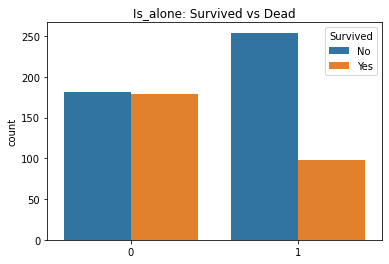

In [38]:
Is_alone = list()
for i in range(0, len(People_on_ticket)):
    if(People_on_ticket[i] == 1 and Family_members[i] == 0):
        Is_alone.append(1)
    else:
        Is_alone.append(0)
Is_alone = np.int64(Is_alone)

sns.countplot(Is_alone,hue='Survived',data=df_train)
plt.legend(['No','Yes'], title="Survived", loc="upper right")
plt.title("Is_alone: Survived vs Dead")
plt.show()

In [39]:
pd.crosstab(df_train['Survived'], Is_alone, colnames=['Is_alone'])

Is_alone,0,1
Survived,,
0.0,181,254
1.0,179,98


Während wir mit jemandem in unserer Nähe eine halbe Überlebenschance haben, hat das Alleinreisen nur eine Überlebenschance von 27,8 %. Kommt Ihnen diese Nummer bekannt vor? Kein Wunder, derselbe Wert war für Passagiere mit dem Wert der Variable People_on_ticket gleich 0. Wir denken, es ist der beste Zeitpunkt, um die Korrelation zwischen allen Familienvariablen zu überprüfen und die Variablen People_on_ticket und Is_alone hinzuzufügen.

Text(0.5, 0.98, 'Travel Companions Correlation Heatmap')

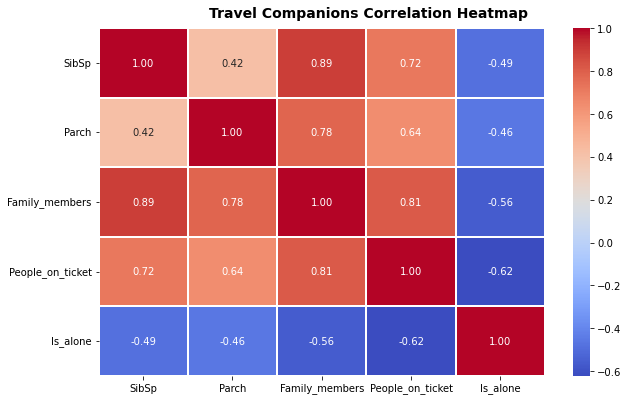

In [40]:
family_variables = pd.DataFrame({'SibSp': df_train['SibSp'], 'Parch': df_train['Parch'],
                                 'Family_members': Family_members, 'People_on_ticket': People_on_ticket,
                                 'Is_alone': Is_alone})

corr = family_variables.corr()
fig, (ax) = plt.subplots(1, 1, figsize=(10,6))
hm = sns.heatmap(corr, ax=ax, cmap="coolwarm", annot=True, fmt='.2f', linewidths=.05)

fig.subplots_adjust(top=0.93)
fig.suptitle('Travel Companions Correlation Heatmap', fontsize=14, fontweight='bold')


Unsere blaue Variable Is_alone ist im Gegensatz zu den Variablen Family_members und People_on_ticket kein Problem. Wie wir bereits erwähnt haben, werden wir jedoch versuchen, die Variablen Family_members und/oder People_on_ticket in kategorisch zu ändern, wodurch die Korrelation verringert wird.

Lassen wir die Zweifel für einen Moment beiseite und gehen wir zur Variablen Is_alone. Wer sind die einsamen Passagiere? Ein Tisch wird definitiv helfen, ihre Identität zu entdecken.

## Fare

Manche Leute sagen: Nichts gibt es umsonst. Wir glauben nicht, dass sie den Preis einiger Tickets für die Titanic gesehen haben, die 0 £ kosten könnten. In Wirklichkeit waren dies aber nur wenige Fälle und das Ticket musste meist bezahlt werden. Wie viel? Es musste hauptsächlich von der Klasse abhängen, mit der wir reisen wollten. Werfen wir also einen Blick auf die Preisliste auf dem berühmtesten Schiff der Welt.

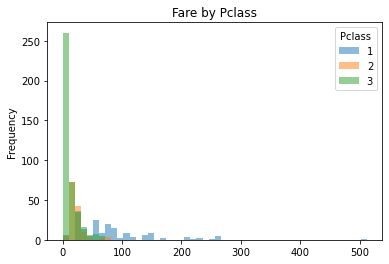

In [41]:
df_train.pivot(columns="Pclass", values="Fare").plot.hist(bins=50, histtype='barstacked', alpha=0.5)
plt.title("Fare by Pclass")
plt.show()

Wir denken, es ist eine gute Idee, den train_set-Passagier mit dem teuersten Ticket im Wert von über 500 £ loszuwerden. Das zweitteuerste Ticket kostet weniger als 300 £, also ist die Lücke groß. Wir interessieren uns nicht für einen Passagier mit solch exorbitanten Reiseerwartungen.

In [42]:
outlier_ind = df_train.loc[df_train['Fare']==max(df_train['Fare'])].index
df_train = df_train.drop(outlier_ind)
df_train = df_train.reset_index(drop=True)

Nochmal das Histogramm, zur besseren Lesbarkeit:

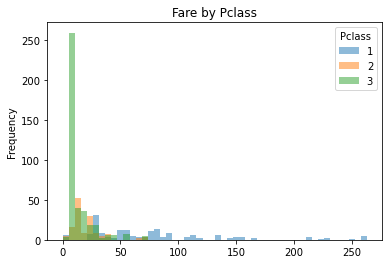

In [43]:


df_train.pivot(columns="Pclass", values="Fare").plot.hist(bins=50, histtype='barstacked', alpha=0.5)
plt.title("Fare by Pclass")
plt.show()



Trotz Streichung des teuersten Tickets gibt es noch viele Ausreißer. Dies liegt jedoch an der natürlichen Einteilung der Fahrgäste in Klassen, kann aber beim Bau des Modells hinderlich sein. An dieser Stelle haben wir jedoch nicht vor, die Tarifwerte zu normalisieren oder zu standardisieren. Wir werden diese Aktivität einer späteren Phase des Projekts überlassen.

Es lohnt sich, einen genaueren Blick auf das Fahrpreis-Histogramm zu werfen. Die Preisverteilung für eine bestimmte Klasse kann sehr groß sein, was besonders in der ersten Klasse zu sehen ist:

In [44]:
print("Minimum price for ticket in first class: ", min(df_train.loc[df_train['Pclass']==1]['Fare']), sep="")

Minimum price for ticket in first class: 0.0


In [45]:
print("Maximum price for ticket in first class: ", max(df_train.loc[df_train['Pclass']==1]['Fare']), sep="")

Maximum price for ticket in first class: 263.0


Die Tickets für die Titanic könnten wirklich kostenlos sein. Andererseits könnten sie auch ein Vermögen kosten. Es kann eine gute Idee sein, zwischen dem Normalpreis und den billigeren und teureren Tickets zu unterscheiden. Am sinnvollsten wäre es, den Ticketpreis mit dem Durchschnittspreis benachbarter Klassen in der Hierarchie zu vergleichen. Wenn beispielsweise unser Ticket der zweiten Klasse weniger kostet als der Durchschnittspreis für ein Ticket der dritten Klasse, sprechen wir von einem billigen Ticket. Wenn es mehr kostet als der Durchschnittspreis eines First-Class-Tickets, ist es ein teures Ticket. Wenn keine dieser Bedingungen erfüllt ist, handelt es sich um ein normales Ticket.

Da die Methodik des Handelns diskutiert wurde, ist es an der Zeit, den Worten Taten folgen zu lassen. 

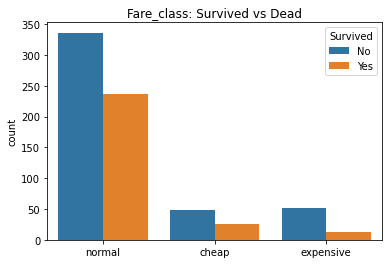

In [46]:
first_class = df_train.loc[df_train['Pclass']==1]
second_class = df_train.loc[df_train['Pclass']==2]
third_class = df_train.loc[df_train['Pclass']==3]
p_class = list(df_train['Pclass'])
fare = list(df_train['Fare'])
Fare_class = list()

for i in range(0,len(p_class)):
    if (p_class[i] == 1):
        if (fare[i] < statistics.mean(second_class['Fare'])):
            Fare_class.append("cheap")
        else:
            Fare_class.append("normal")
    elif (p_class[i] == 2):
        if (fare[i] < statistics.mean(third_class['Fare'])):
            Fare_class.append("cheap")
        elif (fare[i] > statistics.mean(first_class['Fare'])):
            Fare_class.append("expensive")
        else:
            Fare_class.append("normal")
    else:
        if (fare[i] > statistics.mean(second_class['Fare'])):
            Fare_class.append("expensive")
        else:
            Fare_class.append("normal")

Fare_class = pd.Series(Fare_class)
sns.countplot(Fare_class, hue='Survived', data=df_train)
plt.legend(['No','Yes'], title="Survived", loc="upper right")
plt.title("Fare_class: Survived vs Dead")
plt.show()

In [47]:
pd.crosstab([Fare_class, df_train['Survived']], df_train['Pclass'], rownames=['Fare_class', 'Survived'])

Pclass                 1   2    3
Fare_class Survived              
cheap      0.0         6  42    0
           1.0         0  26    0
expensive  0.0         0   0   51
           1.0         0   0   13
normal     0.0        60  29  247
           1.0       105  41   91

Es ist schwierig, die Unterschiede in der Grafik selbst zu erkennen, da sie gering sind. Mit Hilfe der Tabelle können wir jedoch Folgendes ablesen:

- Am größten war die Zahl der Passagiere mit Tickets zu normalen Preisen, sie hatten die größten Überlebenschancen: 41,4%
- Passagiere mit Billigtickets hatten eine Überlebenschance von 35,1 %
- Passagiere mit teuren Tickets starben am häufigsten (Überlebensrate: 20,3 %)

Die Ergebnisse sind nicht intuitiv. Demnach haben Menschen mit teuren Tickets die geringste Überlebenschance. Zu beachten ist allerdings, dass alle Fahrgäste mit teuren Tickets aus der dritten, niedrigsten Klasse kommen.

Keine der Gruppen hatte eine Überlebensrate von mehr als 50 %. Es ist möglich, dass die Variable dadurch nicht für das Modell geeignet ist. Es ist auch möglich, dass der Algorithmus selbst erkennt, welche Tickets ermäßigt und welche teurer sind, basierend auf den Variablen Fare und Pclass.

## Cabin

Wir haben einen Rekordbrecher bei der Anzahl fehlender Beobachtungen. 23 % der vorhandenen Werte sind nicht beeindruckend. Oder besser gesagt, es wäre nicht schön, wenn wir es mit einer normalen Variablen zu tun hätten. In der Kabine-Variablen bedeuten nan-Werte jedoch höchstwahrscheinlich das Fehlen einer Kabine, die wahrscheinlich für höherklassige Passagiere zugänglich war. Schauen wir es uns genauer an.

In [48]:
df_train_no_cabins = df_train.loc[np.where(pd.isnull(df_train['Cabin']))]
df_train_cabins = df_train.loc[~df_train.index.isin(df_train_no_cabins.index)]

df_train_cabins['Pclass'].value_counts()

1    141
3     11
2     11
Name: Pclass, dtype: int64

Tatsächlich waren fast alle Kabinen (86,6 %) mit First-Class-Passagieren besetzt. Es ist möglich, dass Passagiere der zweiten und dritten Klasse auch eine Kabine für zusätzliches Geld kaufen konnten.

Wie sieht also die Überlebensfähigkeit für Menschen aus, die eine Kabine hatten, und für Menschen, die keine Möglichkeit hatten, darin zu reisen?

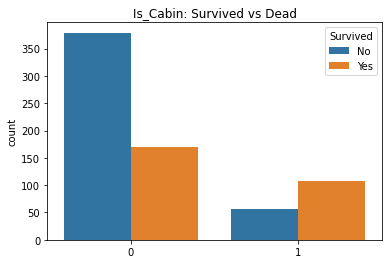

In [49]:
Is_Cabin = list()
cabins = list(df_train['Cabin'])
for i in cabins:
        if (pd.isnull(i)):
            Is_Cabin.append(0)
        else:
            Is_Cabin.append(1)
Is_Cabin = pd.Series(Is_Cabin)

sns.countplot(Is_Cabin,hue='Survived',data=df_train)
plt.legend(['No','Yes'], title="Survived", loc="upper right")
plt.title("Is_Cabin: Survived vs Dead")
plt.show()

Es scheint, dass die Anwesenheit der Kabine zum Überleben beigetragen hat. Aber ist das wahr? Wie die Tabelle zeigt, waren die meisten Leute mit Kabinen First-Class-Passagiere. Wie die Pclass-Variable zeigt, sind First-Class-Passagiere am überlebensfähigsten. Vielleicht liegt die niedrigere Überlebensrate bei Menschen ohne Kabine daran, dass es weniger First-Class-Passagiere gibt und die Kabine das Überleben in keiner Weise beeinträchtigt. Es gibt nichts anderes zu tun, als es zu überprüfen.

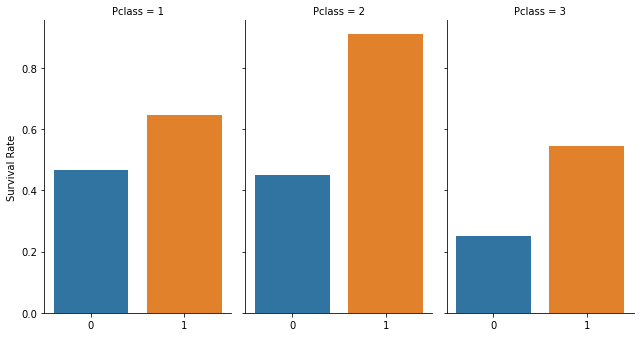

In [50]:
df_train2 = df_train
df_train2['Is_Cabin'] = Is_Cabin
plot = sns.catplot(x="Is_Cabin", y="Survived", col="Pclass", data=df_train2, kind="bar", ci=None, aspect=.6)
plot.set_axis_labels("", "Survival Rate")

In [51]:
pd.crosstab([df_train['Pclass'], Is_Cabin], df_train['Survived'], rownames=['Pclass','Is_Cabin'])

Survived         0.0  1.0
Pclass Is_Cabin          
1      0          16   14
       1          50   91
2      0          70   57
       1           1   10
3      0         293   98
       1           5    6

Eine Kabine macht Sinn. Selbst innerhalb derselben Klassen steigen die Überlebenschancen, wenn wir Zugang dazu haben. Dies zeigt sich am besten in der Mittelklasse, wo nur einer von elf Personen, die eine Kabine hatten, nicht überlebte.

## Embarked

„Es spielt keine Rolle, woher Sie kommen. Alles, was zählt, ist, wohin du gehst.“

Also, Herr Brian Tercy. In diesem Fall liegst du falsch. In diesem Fall interessiert uns nicht das Endziel New York, sondern der Einschiffungshafen. Diese Information wird uns durch die Variable Emmarked gegeben, die einen von drei möglichen Verschiffungshäfen angibt. Im Fall von train_set gibt es zwei Datenlücken, die am besten durch eine einfache Dominante ersetzt werden. Ob der Einschiffungshafen eine Bedeutung für die Überlebensfähigkeit hat, wird sich gleich herausstellen. Sicherlich werden einige interessante Zusammenhänge entdeckt.

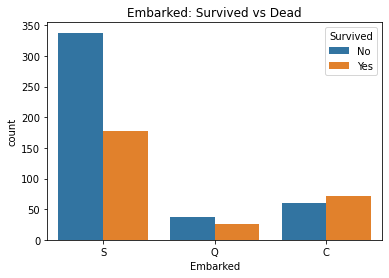

In [52]:
sns.countplot('Embarked',hue='Survived',data=df_train)
plt.legend(['No','Yes'], title="Survived", loc="upper right")
plt.title("Embarked: Survived vs Dead")
plt.show()

In [53]:
pd.crosstab(df_train['Survived'], df_train['Embarked'])

Embarked,C,Q,S
Survived,,,
0.0,60,37,338
1.0,71,26,177


Die folgenden Eigenschaften sind aus dem Diagramm und der Tabelle oben ersichtlich:

- Die meisten Passagiere stiegen in Southampton (S) und die wenigsten in Queenstown (Q) ein.

- Der einzige Einschiffungshafen mit einer Überlebensrate von über 50 % war Cherbourg (C) mit einer Überlebensrate von 54,5 %.

- Das Überleben in den Häfen von Southampton und Queenstown war mit 34,4 % für Southampton bzw. 41,3 % für Queenstown ähnlich.

Southampton ist ein Favorit von Männern mittleren Alters der dritten Klasse, die alleine reisen. Das wissen wir bereits aus der Analyse der Is_alone-Variablen. Es lohnt sich jedoch, sich die Einschiffungshäfen genauer anzusehen. Jeder von ihnen befand sich in einem anderen Land (Southampton - England, Queenstown - Irland, Cherbourg - Frankreich), sodass die Passagierstruktur in jedem dieser Länder auch von der politischen Situation beeinflusst werden konnte. Wir haben keine Daten zu diesem Thema, aber wir können immer andere interessante Beziehungen überprüfen.

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


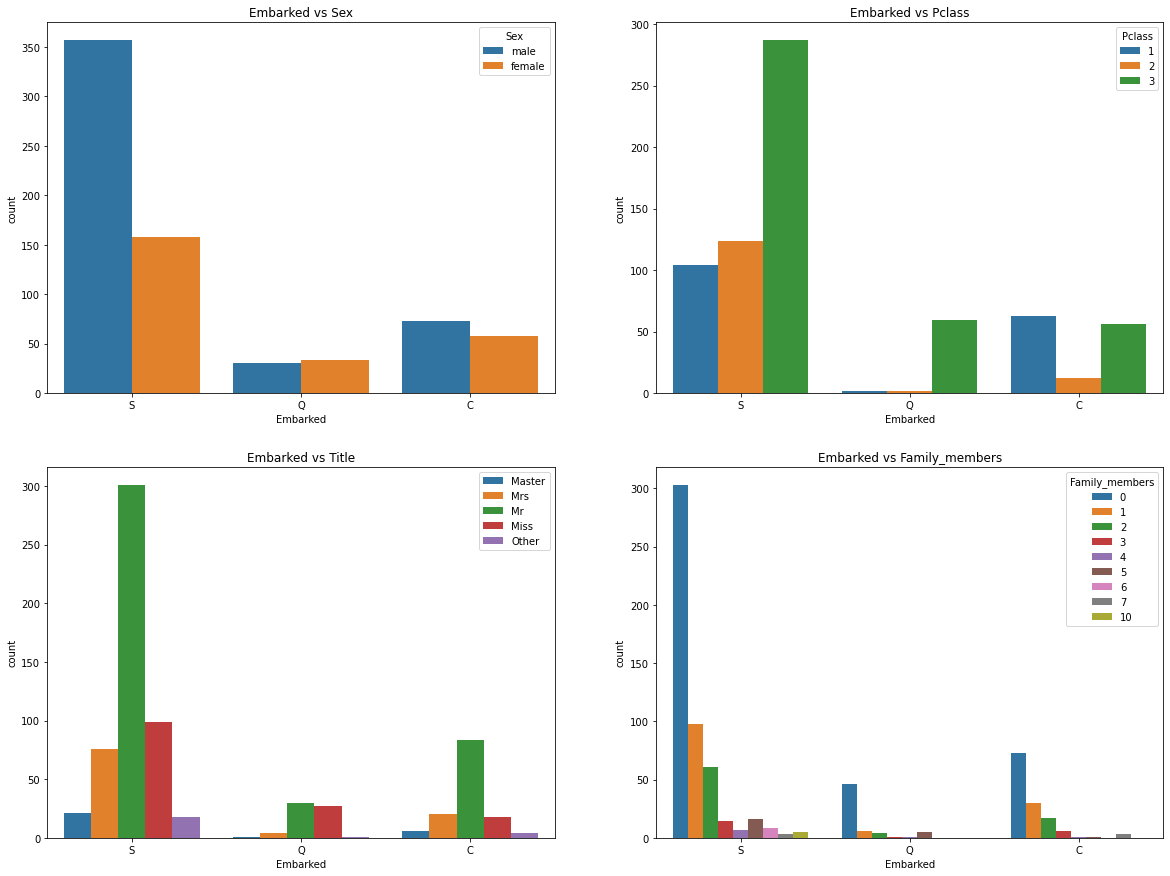

In [54]:
f,ax = plt.subplots(2,2,figsize=(20,15))

sns.countplot('Embarked',hue='Sex',data=df_train,ax=ax[0,0])
plt.legend(title="Sex", loc="upper right")
ax[0,0].set_title('Embarked vs Sex')

sns.countplot('Embarked',hue='Pclass',data=df_train,ax=ax[0,1])
plt.legend(title="Pclass", loc="upper right")
ax[0,1].set_title('Embarked vs Pclass')

sns.countplot('Embarked',hue=Title,data=df_train,ax=ax[1,0])
plt.legend(title="Title", loc="upper right")
ax[1,0].set_title('Embarked vs Title')

sns.countplot('Embarked',hue=Family_members,data=df_train,ax=ax[1,1])
plt.legend(title="Family_members", loc="upper right")
ax[1,1].set_title('Embarked vs Family_members')

plt.show()

In [55]:
print("Average age of Southampton passenger:", round(np.nanmean(df_train[df_train['Embarked'] == 'S']['Age'])))
print("Average age of Queenstown passenger:", round(np.nanmean(df_train[df_train['Embarked'] == 'Q']['Age'])))
print("Average age of Cherbourg passenger:", round(np.nanmean(df_train[df_train['Embarked'] == 'C']['Age'])))


Average age of Southampton passenger: 29
Average age of Queenstown passenger: 27
Average age of Cherbourg passenger: 31


Die Passagierstruktur in den Häfen war wie folgt:

- Southampton: Der statistische Passagier ist hier ein erwachsener Mann dritter Klasse, der allein (bekannter Schluss) oder mit 1-2 Familienmitgliedern reist. Im Vergleich zu anderen Häfen hatten auch Passagiere zweiter Klasse und verheiratete Frauen einen erheblichen Anteil. Von Southampton aus zogen große Familien ab
- Queenstown: Der statistische Passagier hier ist eine unverheiratete Frau dritter Klasse, die alleine reist. Dies ist der einzige Hafen mit einer solchen Dominanz von Frauen, aber die Überlebensrate war für den Hafen von Cherbourg höher (der Hafen von Queenstown hatte einen noch größeren Vorteil in Bezug auf Passagiere der dritten Klasse).
- Cherbourg: Nicht Port, sondern Halbport. Die Hälfte der Fahrgäste sind Männer, die andere Hälfte Frauen. Die Hälfte war in der dritten oder zweiten Klasse, die andere Hälfte in der ersten. Die Hälfte der Passagiere reiste alleine und die andere Hälfte mit einem oder zwei Familienmitgliedern. Natürlich gab es leichte Schwankungen, aber der Anteil liegt bei etwa der Hälfte

Eingeschifft ist definitiv eine Variable, die in das Modell aufgenommen werden soll. Es spielt eine Rolle, woher Sie kommen, Mr. Tercy. 

## Age

"Nun, wie alt bist du, wo ist dein Hafen?". Nicht alle Passagiere wollten den ersten Teil dieser Frage beantworten. Alter zeigte eine große Anzahl fehlender Werte (in train_set sind es 18,8 %). Fehlende Beobachtungen mit einem einzigen Wert vervollständigen, z.B. Durchschnitt, würde einen zu großen Einfluss auf die Standardabweichung der Variable Alter haben. Andererseits erscheint mir das Auffüllen von Datenlücken mit Methoden wie KNN aufgrund des hohen Prozentsatzes an Datenlücken nicht sinnvoll. Es ist auch möglich, dass das Fehlen eines bestimmten Passagieralters mit dem Überleben des Passagiers zusammenhängt. Bei der Profilerstellung von Alleinreisenden konnten wir feststellen, dass etwa 60 % der fehlenden Werte für die Variable "Alter" von Alleinreisenden stammten. Mal sehen, ob es etwas gibt, das Menschen eines unbekannten Alters verbindet.

In [56]:
train_set_age = df_train
train_set_age['Is_alone'] = np.delete(Is_alone, outlier_ind)
train_set_unknown_age = train_set_age[np.isnan(train_set_age['Age'])]

pd.crosstab([train_set_unknown_age['Pclass'], train_set_unknown_age['Sex']],
            [train_set_unknown_age['Embarked'], train_set_unknown_age['Is_alone']])

Embarked       C      Q      S    
Is_alone       0   1  0   1  0   1
Pclass Sex                        
1      female  5   0  0   0  2   0
       male    0   3  0   0  5   6
2      female  0   0  0   1  1   0
       male    0   1  0   0  3   3
3      female  5   2  6  15  8   2
       male    3  12  6  12  9  24

Tatsächlich sind etwa 60 % der Datenlücken Personen, die allein reisen. Gleichzeitig sind, wenn wir nur Menschen dritter Klasse betrachten, diese für 77,6 % der Datenlücken verantwortlich. Wenn wir beide Bedingungen (Einzel- und/oder Passagiere der dritten Klasse) kombinieren, erhalten wir 88,1 % der Datenlücken.

Ist eine so hohe Prävalenz von Reisenden dritter Klasse und/oder einsamer Reisender für Passagiere bekannten Alters?

In [57]:
train_set_known_age = train_set_age[~np.isnan(train_set_age['Age'])]
train_set_known_age = train_set_known_age[((train_set_known_age['Pclass']==3) & 
                                           (train_set_known_age['Is_alone']==1))|(train_set_known_age['Pclass']==3)]

print("Percentage of single and/or third class passengers with a known age: ", 
      round(len(train_set_known_age.index)*100/len(df_train.index), 2), "%", sep="")



Percentage of single and/or third class passengers with a known age: 41.91%


Anteil der Single- und/oder Third-Class-Passagiere mit bekanntem Alter: 41,91 %
Und was ist mit der Überlebensrate?

In [58]:
print("Survival ratio for people of an unknown age: ", 
      round((np.sum(train_set_unknown_age['Survived']==1)*100/len(train_set_unknown_age.index)),2), "%", sep="")
print("Survival ratio for people of a known age: ", 
      round((np.sum(train_set_known_age['Survived']==1)*100/len(train_set_known_age.index)),2), "%", sep="")

Survival ratio for people of an unknown age: 31.34%
Survival ratio for people of a known age: 25.17%


Die Überlebensrate ist ziemlich ähnlich, wenn auch etwas höher für Menschen unbekannten Alters. Einzelne und/oder Passagiere der dritten Klasse dominieren in einer Gruppe mit bekanntem Alter nicht so sehr. Obwohl Gruppen einander ähnlich sind, unterscheiden sie sich leicht. Es ist möglich, dass das Fehlen einer Altersangabe einen Sinn ergibt. Aus diesem Grund habe wir uns entschieden, einen separaten Eimer für Menschen mit unbestimmter Anzahl von Jahren zu erstellen. Dieser Schritt zieht einen weiteren Schritt nach sich – das Erstellen weiterer Buckets für die Variable Alter. Um die richtige Wahl zu treffen, betrachten wir die Abhängigkeit des Alters von der Überlebensfähigkeit.

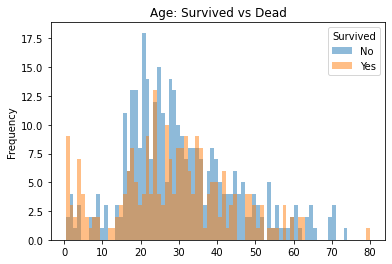

In [59]:
df_train.pivot(columns="Survived", values="Age").plot.hist(bins=80, histtype='barstacked', alpha=0.5)
plt.legend(['No','Yes'], title="Survived", loc="upper right")
plt.title("Age: Survived vs Dead")
plt.show()

In all diesen Bars kann man sich leicht verirren. Meiner Meinung nach gibt es jedoch drei Hauptaltersbereiche:

- Jugendliche - Personen, die höchstens 15 Jahre alt sind. Das Histogramm zeigt, wie die Anzahl der Passagiere und ihre Sterblichkeit nach dem Überqueren dieser Barriere zunehmen
- Menschen mittleren Alters - Menschen, die über 15, aber unter 50 Jahre alt sind. Es gab Perioden mit weniger Überleben, aber auch mit mehr Überleben. Allerdings lässt sich kein Zeitraum ausmachen, in dem mehrere gute Jahre hintereinander eine Verbesserung der Überlebensfähigkeit zu beobachten ist
- Alte Menschen - Die Lebenserwartung in Großbritannien zu Beginn des 20. Jahrhunderts während der Titanic betrug etwa 50 Jahre (Quelle: https://ourworldindata.org/life-expectancy). Wir nehmen an, dass Frankreich sich von diesem Ergebnis nicht unterscheidet, weil es auch ein hoch entwickeltes Land war. Seit diesem Alter sind auch einige Änderungen im Diagramm zu sehen. Es gibt bereits wenige Passagiere und ihre Sterblichkeitsrate steigt. Deshalb habe wir uns entschieden, diese Gruppe als dritte anzugeben.
Es lohnt sich, sich bei der Auswahl zu vergewissern und die Überlebensfähigkeit für jede der aufgeführten Gruppen (auch für Menschen mit fehlendem Alter) zu prüfen.

(0.0, 1.0)

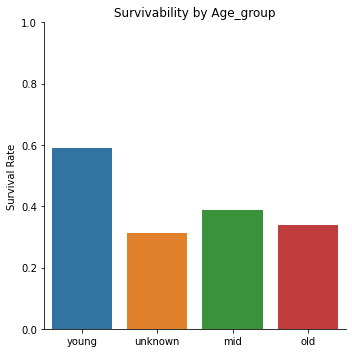

In [60]:
Age_group = list()
age = list(df_train['Age'])

for i in age:
    if (i <= 15):
        Age_group.append('young') 
    elif (i < 50):
        Age_group.append('mid')
    elif (i >= 50):
        Age_group.append('old')
    else:
        Age_group.append('unknown')
Age_group = pd.Series(Age_group)

train_set_age_groups = df_train
train_set_age_groups['Age_group'] = Age_group
plot = sns.catplot(x="Age_group", y="Survived", data=train_set_age_groups, kind="bar", ci=None)
plot.set_axis_labels("", "Survival Rate")
plt.title("Survivability by Age_group")
plt.gca().set_ylim([0,1])


Die Schlussfolgerungen lauten wie folgt:

- Junge Menschen hatten die größten Überlebenschancen (ca. 60 %).

- Insgesamt überlebten Menschen mittleren Alters etwas häufiger als ältere Menschen (ca. 40 % vs. ca. 35 %).
- Menschen unbekannten Alters hatten die geringste Überlebenschance (wie bereits erwähnt, 31,34% Chance)

Die Schlussfolgerungen sind die gleichen wie die, die aus dem Diagramm beobachtet wurden. Schön.

Das obige „Nett“ hat unser Abenteuer mit explorativer Datenanalyse und Feature-Engineering abgeschlossen. Bis zum Ende des Projekts bleiben jedoch noch einige Schritte, in denen die ursprünglichen Variablen (höchstens in leicht veränderter Form) und ihre neuen Freunde, Variablen: Title, Family_members, People_on_ticket, Is_alone, Fare_class und Is_cabin werden ihre Verwendung finden. Es besteht keine Notwendigkeit, die Dinge aufzuhalten, also lasst uns zur nächsten Stufe übergehen.

# Datenaufbereitung

Es ist an der Zeit, dieses Wissen zu nutzen, um die Daten für das Modelltraining vorzubereiten. In dieser Phase sind sowohl train_set als auch test_set seit Beginn des Projekts unverändert, direkt nach ihrer Trennung. Während der explorativen Datenanalyse und des Feature-Engineerings haben wir keine Änderungen daran vorgenommen. Pipelines werden mir helfen, alle Variablentransformationen anzuwenden, die wir im vorherigen Kapitel vorgeschlagen haben, und die von mir vorgeschlagenen Variablen hinzuzufügen. Dies ist auch beim Konvertieren des Satzes titanic_sub nützlich, der für die Übermittlung von Vorhersagen verwendet wird.

In [61]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import FeatureUnion
from sklearn.preprocessing import StandardScaler

Pipelines arbeiten mit Klassen. Die relevanten Klassen geben an, wie die Daten transformiert werden sollen, und die Pipelines wenden diese Transformationen an. Dieses Kapitel wird daher die folgenden drei Teile unterscheiden:
- Klassen
- Pipelines
- Datentransformation

## Klassen

In [62]:
class TitleSelector(BaseEstimator, TransformerMixin):
    def __init__(self, attribute_names):
        self._attribute_names = attribute_names
    def fit(self, X, y=None):
        return self
    def get_title(self, obj):
        title = ((obj.rsplit(',', 1)[1]).rsplit('.', 1)[0]).strip()
        return title
    def transform(self, X):
        X.loc[:, 'Title'] = X[self._attribute_names].apply(self.get_title)
        X = X.drop(self._attribute_names, 1)
        return X.values

class TitleCoder(BaseEstimator, TransformerMixin):
    def __init__(self, attribute_names):
        self._attribute_names = attribute_names
    def fit(self, X, y=None):
        return self
    def code_title(self, obj):
        if (obj == 'Mr'):
            title_c = 'Mr'
        elif (obj == 'Mrs'):
            title_c = 'Mrs'
        elif (obj == 'Miss'):
            title_c = 'Miss'
        elif (obj == 'Master'):
            title_c = 'Master'
        else:
            title_c = 'Other'
        return title_c
    def transform(self, X):
        X.loc[:, 'Title_c'] = X[self._attribute_names].apply(self.code_title)
        X = X.drop(self._attribute_names, 1)
        return X.values

class AgeCoder(BaseEstimator, TransformerMixin):
    def __init__(self, attribute_names):
        self._attribute_names = attribute_names
    def fit(self, X, y=None):
        return self
    def code_age(self, obj):
        if (obj <= 15):
            age_c = 'young'
        elif (obj < 50):
            age_c = 'mid'
        elif (obj >= 50):
            age_c = 'old'
        else:
            age_c = 'unknown'
        return age_c
    def transform(self, X):
        X.loc[:, 'Age_c'] = X[self._attribute_names].apply(self.code_age)
        X = X.drop(self._attribute_names, 1)
        return X.values

class SibSpCoder(BaseEstimator, TransformerMixin):
    def __init__(self, attribute_names):
        self._attribute_names = attribute_names
    def fit(self, X, y=None):
        return self
    def code_SibSp(self, obj):
        if (obj == 0):
            SibSp_c = 'zero'
        elif (obj == 1):
            SibSp_c = 'one'
        else:
            SibSp_c = 'more'
        return SibSp_c
    def transform(self, X):
        X.loc[:, 'SibSp_c'] = X[self._attribute_names].apply(self.code_SibSp)
        X = X.drop(self._attribute_names, 1)
        return X.values

class ParchCoder(BaseEstimator, TransformerMixin):
    def __init__(self, attribute_names):
        self._attribute_names = attribute_names
    def fit(self, X, y=None):
        return self
    def code_Parch(self, obj):
        if (obj == 0):
            Parch_c = 'zero'
        elif (obj == 1 or obj == 2):
            Parch_c = 'one/two'
        else:
            Parch_c = 'more'
        return Parch_c
    def transform(self, X):
        X.loc[:, 'Parch_c'] = X[self._attribute_names].apply(self.code_Parch)
        X = X.drop(self._attribute_names, 1)
        return X.values

class Family_members(BaseEstimator, TransformerMixin):
    def __init__(self, attribute_names):
        self._attribute_names = attribute_names
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        X.loc[:, 'Family_members'] = X[self._attribute_names] + X['Parch']
        return X.values

class Family_membersCoder(BaseEstimator, TransformerMixin):
    def __init__(self, attribute_names):
        self._attribute_names = attribute_names
    def fit(self, X, y=None):
        return self
    def code_Family_members(self, obj):
        if (obj == 0):
            Family_members_c = 'zero'
        elif (obj == 1 or obj == 2):
            Family_members_c = 'one/two'
        elif (obj == 3):
            Family_members_c = 'three'
        else:
            Family_members_c = 'more'
        return Family_members_c
    def transform(self, X):
        X.loc[:, 'Family_members_c'] = X[self._attribute_names].apply(self.code_Family_members)
        X = X.drop(self._attribute_names, 1)
        return X.values

class People_on_ticket(BaseEstimator, TransformerMixin):
    def __init__(self, attribute_names):
        self._attribute_names = attribute_names
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        counts = list()
        tickets = list(X[self._attribute_names])
        for i in tickets:
            counts.append(ticket_base.count(i))
        #is_ticket_uni = [x if x == 1 else 0 for x in counts]
        X.loc[:, 'People_on_ticket'] = counts
        return X.values
    
class People_on_ticketCoder(BaseEstimator, TransformerMixin):
    def __init__(self, attribute_names):
        self._attribute_names = attribute_names
    def fit(self, X, y=None):
        return self
    def code_People_on_ticket(self, obj):
        if (obj == 1):
            People_on_ticket_c = 'one'
        elif (obj == 2):
            People_on_ticket_c = 'two'
        elif (obj == 3):
            People_on_ticket_c = 'three'
        elif (obj == 4):
            People_on_ticket_c = 'four' 
        else:
            People_on_ticket_c = 'more'
        return People_on_ticket_c
    def transform(self, X):
        X.loc[:, 'People_on_ticket_c'] = X[self._attribute_names].apply(self.code_People_on_ticket)
        X = X.drop(self._attribute_names, 1)
        return X.values

class Is_Alone(BaseEstimator, TransformerMixin):
    def __init__(self, attribute_names):
        self._attribute_names = attribute_names
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        family_members = list(X['Family_members'])
        ppl_on_ticket = list(X[self._attribute_names])
        is_alone = list()
        for i in range(0,len(ppl_on_ticket)):
            if (ppl_on_ticket[i] == 1 and family_members[i] == 0):
                is_alone.append(1)
            else:
                is_alone.append(0)
        X.loc[:, 'Is_alone'] = is_alone
        return X.values
    
class Is_Cabin(BaseEstimator, TransformerMixin):
    def __init__(self, attribute_names):
        self._attribute_names = attribute_names
    def fit(self, X, y=None):
        return self
    def code_Cabin(self, obj):
        if (pd.isnull(obj)):
            is_cabin = 0
        else:
            is_cabin = 1
        return is_cabin
    def transform(self, X):
        X.loc[:, 'Is_cabin'] = X[self._attribute_names].apply(self.code_Cabin)
        X = X.drop(self._attribute_names, 1)
        return X.values

class FareClass(BaseEstimator, TransformerMixin):
    def __init__(self, attribute_names):
        self._attribute_names = attribute_names
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        first_class = X.loc[X['Pclass']==1]
        second_class = X.loc[X['Pclass']==2]
        third_class = X.loc[X['Pclass']==3]
        p_class = list(X['Pclass'])
        fare = list(X[self._attribute_names])
        fare_class = list()
        for i in range(0,len(p_class)):
            if (p_class[i] == 1):
                if (fare[i] < statistics.mean(second_class['Fare'])):
                    fare_class.append("cheap")
                else:
                    fare_class.append("normal")
            elif (p_class[i] == 2):
                if (fare[i] < statistics.mean(third_class['Fare'])):
                    fare_class.append("cheap")
                elif (fare[i] > statistics.mean(first_class['Fare'])):
                    fare_class.append("expensive")
                else:
                    fare_class.append("normal")
            else:
                if (fare[i] > statistics.mean(second_class['Fare'])):
                    fare_class.append("expensive")
                else:
                    fare_class.append("normal")
        X.loc[:, 'Fare_class'] = fare_class
        return X.values

## Pipelines

In [63]:
#Pipelines for creating/transforming variables.
name = 'Name'
name_pipeline = Pipeline(steps=[
    ('get_title', TitleSelector(name))
])
    
title = 'Title'  
title_pipeline = Pipeline(steps=[
    ('code_title', TitleCoder(title))
]) 

age = 'Age'
age_pipeline = Pipeline(steps=[
    ('code_age', AgeCoder(age))
]) 

sibsp = 'SibSp'
sibsp_pipeline = Pipeline(steps=[
    ('code_sibsp', SibSpCoder(sibsp))#,
])

sibsp_pipeline2 = Pipeline(steps=[
    ('create_family_members', Family_members(sibsp))
])
    
parch = 'Parch'
parch_pipeline = Pipeline(steps=[
    ('code_parch', ParchCoder(parch))
])

family_members = 'Family_members'
family_members_pipeline = Pipeline(steps=[
    ('code_family_members', Family_membersCoder(family_members))
])

ticket = 'Ticket'
ticket_pipeline = Pipeline(steps=[
    ('create_People_on_ticket', People_on_ticket(ticket)),
])

people_on_ticket = 'People_on_ticket'
ticket_pipeline2 = Pipeline(steps=[
    ('code_People_on_ticket', People_on_ticketCoder(people_on_ticket)),
])

is_alone_pipeline = Pipeline(steps=[
    ('create_is_alone', Is_Alone(people_on_ticket)),
])

cabin = 'Cabin'
cabin_pipeline = Pipeline(steps=[
    ('code_cabin', Is_Cabin(cabin)),
])
    
fare = 'Fare'
fare_pipeline = Pipeline(steps=[
    ('fare_class', FareClass(fare)),
])

#Categorical variables - they need One-Hot Encoding. Missing values are inputed with most frequent values
#(a maximum of a few observations may be missing for these variables). All variables are standardized.
attribs1 = ['Pclass', 'Title_c', 'Sex', 'Age_c',# 'SibSp_c', 'Parch_c',
            #'People_on_ticket_c',
            'Family_members_c', 'Embarked', #'Fare_class',
            ]
attribs1_pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy="most_frequent")),
    ('encoder', OneHotEncoder(sparse=False)),
    ('standarizer', StandardScaler())
])

#Numerical variables - no need for One-Hot Encoding. Missing values are inputed with median
#(a maximum of a few observations may be missing for these variables). All variables are standardized.
attribs2 = ['SibSp', 'Parch', #'Family_members', 'People_on_ticket', 'Is_alone',
            'Fare', 'Is_cabin']
attribs2_pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy="median")),
    ('standarizer', StandardScaler())
])

#Pipeline dropping unused variables and joining both pipelines from above: one for categorical variables
#and one for numerical variables.
preprocessor = ColumnTransformer(
    remainder = 'drop',
    transformers=[
        ('first', attribs1_pipeline, attribs1),
        ('second', attribs2_pipeline, attribs2)
])

#Joining all created pipelines into one.
full_pipeline = FeatureUnion([
    ('name_pipeline', name_pipeline),
    ('title_pipeline', title_pipeline),
    ('age_pipeline', age_pipeline),
    #('sibsp_pipeline', sibsp_pipeline),
    ('sibsp_pipeline2', sibsp_pipeline2),
    #('parch_pipeline', parch_pipeline),
    ('family_members_pipeline', family_members_pipeline),
    #('ticket_pipeline', ticket_pipeline),
    #('is_alone_pipeline', is_alone_pipeline),
    #('ticket_pipeline2', ticket_pipeline2),
    ('cabin_pipeline', cabin_pipeline),
    #('fare_pipeline', fare_pipeline),
    ('preprocessor', preprocessor)
])

#Pipeline which will definitely drop unused columns after usage of full_pipeline 
#(one usage of preprocessor is not enough).
#Variables won't be transformed again in this pipeline, I checked that.
full_pipeline2 = FeatureUnion([
    ('preprocessor', preprocessor)
])

Wie wir sicherlich im Code bemerkt haben, sind einige der Attribute und Pipelines in full_pipeline gehasht. Das bedeutet nicht, dass diese Zeilen nicht einmal im Code verwendet wurden. In diesem Projekt stelle wir jedoch die Lösung vor, mit der wir das beste Ergebnis erzielt haben. Durch Versuch und Irrtum sind wir zu der oben vorgestellten Lösung gekommen. Das beste Ergebnis wurde ohne Verwendung von Hash-Variablen erzielt. Auf diese Weise wurden im endgültigen Modell die folgenden Variablen verwendet:

- Pclass
- Title_c
- Sex
- Age_c
- SibSp
- Parch
- Family_members_c
- Fare
- Is_cabin
- Embarked

## Datentransformation

Die erforderlichen Datensätze werden erhalten, indem nacheinander zwei Pipelines verwendet werden: zuerst eine full_pipeline zum Erstellen und Transformieren der relevanten Variablen und dann eine full_pipeline2 zum Entfernen unnötiger Variablen.

In [64]:
train_set_prepared = full_pipeline.fit_transform(df_train)
train_set_prepared = full_pipeline2.fit_transform(df_train)
X_train_prepared = train_set_prepared
y_train_prepared = df_train['Survived']

test_set_prepared = full_pipeline.fit_transform(df_valid)
test_set_prepared = full_pipeline2.fit_transform(df_valid)
X_test_prepared = test_set_prepared
y_test_prepared = df_valid['Survived']

# Modelltraining, Evaluation und Tuning

Tatsächlich liegt ein Teil der Modellbewertung tatsächlich hinter uns. Im vorigen Kapitel haben wir die Variablen angegeben, mit denen wir das beste Ergebnis erzielen konnten. Dies war offensichtlich Teil der Modellbewertung. Aber in diesem Kapitel werden wir uns direkt auf die Modelle konzentrieren.

## Feature selection

Leider hat der KNN-Algorithmus nicht die Möglichkeit, die Wichtigkeit von Merkmalen zu erahnen. Daher kann es nicht verwendet werden, um die Merkmale zu bestimmen, die den größten und den geringsten Einfluss auf die erzielten Ergebnisse haben. Aus diesem Grund habe wir uns entschieden, die Wichtigkeit von Merkmalen zu verwenden, die durch die Random-Forest-Methode angezeigt werden. Es war etwas schlechter als das KNN, aber wir glauben, dass in beiden Fällen die Prioritätsangaben ziemlich ähnlich sind.

Wie wird diese Phase des Projekts ablaufen? Mit Hilfe der Rastersuche werden wir ein Random Forest-Modell erstellen, das die beste Genauigkeit für das Trainingsset liefert. Dann werden wir die Wichtigkeit von Features daraus entnehmen. Wir werden es verwenden, um KNN-Modelle zu schätzen, die gemäß dem Random-Forest-Modell bis zu 25 der wichtigsten Variablen haben (eine so hohe Zahl ergibt sich aus der Tatsache, dass einige der Variablen One-Hot-codiert waren). Wir werden das Ergebnis nicht nur gegen das Trainingsset messen, sondern auch gegen das Testset (wie Sie sich aus dem ersten Kapitel erinnern, ist test_set eigentlich ein Validierungsset, das echte Testset wird titanic_sub sein, für das Vorhersagen als generiert werden Endergebnis des Projekts) sowie die Differenz zwischen diesen Werten. Dies ist von entscheidender Bedeutung und ermöglicht die Beurteilung, ob eine Überanpassung mit einer bestimmten Anzahl von Variablen für das Modell vorliegt. Die Ergebnisse werden in einem Datenrahmen gespeichert, der am Ende des nächsten Codeblocks präsentiert wird. 

In [65]:
%%time
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

rf_model = RandomForestClassifier(random_state=42)

params_grid = [
        {'n_estimators': [100, 200, 300, 400, 500],
         'criterion': ['gini', 'entropy'],
         'min_samples_split': [2, 3, 4, 5],
         'max_features': ['auto', 'log2', None],
         'bootstrap': ['True', 'False']}
]

grid_search = GridSearchCV(rf_model, params_grid, cv=5, scoring="accuracy", n_jobs=1)
grid_search.fit(X_train_prepared, y_train_prepared)
grid_search.best_params_

CPU times: user 8min 34s, sys: 7.48 s, total: 8min 42s
Wall time: 8min 45s


{'bootstrap': 'True',
 'criterion': 'gini',
 'max_features': None,
 'min_samples_split': 5,
 'n_estimators': 200}

Der obige gab nur eine erste Anzahl von Parametern an, von denen aus eine detailliertere Suche beginnen sollte. 

In [66]:
%%time
params_grid2 = [
        {'n_estimators': [120, 140, 160, 180, 200, 220, 240, 260, 280],
         'criterion': ['gini', 'entropy'],
         'min_samples_split': [4, 5],
         'max_features': ['auto', None],
         'bootstrap': ['True']}
]

grid_search2 = GridSearchCV(rf_model, params_grid2, cv=5, scoring="accuracy", n_jobs=1)
grid_search2.fit(X_train_prepared, y_train_prepared)

#Function for getting the importance of top k features 
def indices_of_top_k(arr, k):
    return np.sort(np.argpartition(np.array(arr), -k)[-k:])

#Function calculating scores for each restricted data set
def fs_calculate_results():
    train_prediction = list()
    test_prediction = list()
    knn_model = KNeighborsClassifier()
    feature_importances = grid_search2.best_estimator_.feature_importances_
    for i in range(1,26):
       indices_of_top = indices_of_top_k(feature_importances, i)
       X_train_restricted = X_train_prepared[:, indices_of_top]
       X_test_restricted = X_test_prepared[:, indices_of_top]
    #The square of the number of observations in train_set is close to 27, so the number
    #of neighbours will oscillate around this number
       params_grid_fs = [
        {'n_neighbors': [20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35],
         'weights': ['uniform', 'distance'],
         'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
         'metric': ['minkowski', 'euclidean', 'manhattan']}
       ]
       #print(i)
       grid_search_fs = GridSearchCV(knn_model, params_grid_fs, cv=5, scoring="accuracy", n_jobs=1)
       grid_search_fs.fit(X_train_restricted, y_train_prepared)
       train_prediction.append(grid_search_fs.best_score_)
       #print("Train_set: ", grid_search_fs.best_score_)
       knn_final_model = grid_search_fs.best_estimator_
       knn_predictions = knn_final_model.predict(X_test_restricted)
       test_prediction.append(accuracy_score(y_test_prepared, knn_predictions))
       #print("Test_set: ", accuracy_score(y_test_prepared, knn_predictions))
    return train_prediction, test_prediction

train_pred, test_pred = fs_calculate_results()
fs_results = pd.DataFrame({'train_set': train_pred, 'test_set': test_pred})
fs_results['train-test_difference'] = fs_results['train_set'] - fs_results['test_set']
fs_results.index += 1
fs_results = fs_results.sort_values('train-test_difference')
fs_results

CPU times: user 14min 1s, sys: 15.8 s, total: 14min 16s
Wall time: 6min 35s


,train_set,test_set,train-test_difference
10,0.826997,0.849162,-0.022165
11,0.828425,0.849162,-0.020737
17,0.831212,0.843575,-0.012363
9,0.834069,0.843575,-0.009507
15,0.829824,0.837989,-0.008165
16,0.829834,0.837989,-0.008155
13,0.828405,0.832402,-0.003997
20,0.835458,0.837989,-0.002531
23,0.831203,0.832402,-0.001200
14,0.831242,0.832402,-0.001160


In der oben generierten Tabelle ist die Indexnummer die Anzahl der berücksichtigten Variablen (von 1 bis 25). Die zweite Spalte zeigt das Ergebnis für die 5-fache Kreuzvalidierung auf dem Trainingsset (5-fache Kreuzvalidierung wurde auch verwendet, um das Random-Forest-Modell zu trainieren), während Spalte Nummer drei die Genauigkeit für das Testset zeigt. Die Zeilen im Datenrahmen wurden nach der letzten Spalte sortiert, die den Unterschied zwischen dem Ergebnis für den Trainings- und den Testsatz zeigt. Wir interessieren uns für Werte, die möglichst nahe bei Null liegen, aber positiv, nicht negativ. Ein negativer Wert bedeutet, dass das Modell falsch ist, weil es eine bessere Genauigkeit für das Testset liefert.

Nach dem gerade besprochenen Zeitplan ist das beste Modell dasjenige mit den 13 wichtigsten Parametern. Nach der finalen Einreichung stellte sich jedoch heraus, dass er etwas schlechtere Ergebnisse liefert als der zweite Kandidat, nämlich Nummer 25 (maximale Anzahl an Variablen). Die nächsten Variablen auf der Liste haben das Ergebnis von Nummer 25 nicht übertroffen, also habe wir uns entschieden, es zu verlassen und es im nächsten Schritt zu verwenden, der die Schätzung und Validierung des KNN-Modells sein wird. Obwohl dieser Schritt bereits in einer Schleife war, war er nicht so detailliert, wie wir es gerne tun würden. Es ist also an der Zeit, sich die Modelle genauer anzusehen, mit denen wir die Geheimnisse der Titanic lüften können. 

## K-Nearest Neighbors model

Es gibt so wenig, was uns vom endgültigen Modell trennt. Vergleichen wir natürlich unsere bisherige Arbeit, denn auch das Training und die Validierung des Modells und dann dessen Tuning sind ein wichtiges Element, das genauer betrachtet werden muss. Und wir werden uns das KNN-Modell ansehen, das seine Konkurrenten ein wenig hinter sich gelassen hat. Lassen Sie uns zuerst prüfen, welche Parameter die besten Ergebnisse für den Trainingssatz liefern. 

In [67]:
%%time
feature_importances = grid_search2.best_estimator_.feature_importances_
indices_of_top = indices_of_top_k(feature_importances, 25)
X_train_prepared = X_train_prepared[:, indices_of_top]
X_test_prepared = X_test_prepared[:, indices_of_top]

knn_model = KNeighborsClassifier()
params_grid = [
        {'n_neighbors': [20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35],
         'weights': ['uniform', 'distance'],
         'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
         'metric': ['minkowski', 'euclidean', 'manhattan']}
]

grid_search = GridSearchCV(knn_model, params_grid, cv=5, scoring="accuracy", n_jobs=1)
grid_search.fit(X_train_prepared, y_train_prepared)

grid_search.best_params_

CPU times: user 40 s, sys: 777 ms, total: 40.7 s
Wall time: 12.9 s


{'algorithm': 'auto',
 'metric': 'manhattan',
 'n_neighbors': 26,
 'weights': 'uniform'}

Und nun die Genauigkeit für beide Sätze: 

In [68]:
print("Training dataset accuracy: ", grid_search.best_score_, sep="")


knn_model = grid_search.best_estimator_
knn_predictions = knn_model.predict(X_test_prepared)
print("Validation dataset accuracy: ", accuracy_score(y_test_prepared, knn_predictions), sep="")

Training dataset accuracy: 0.8269870974096326
Validation dataset accuracy: 0.8212290502793296


Aber bist du sicher? Grid_search hat das beste Modell an das Trainingsset zurückgegeben. Ja, Kreuzvalidierung wurde dort verwendet, aber es ist nicht bekannt, wie das Modell auf dem Validierungsset und auf dem tatsächlichen Testset funktionieren wird. Es wäre also eine gute Idee, eine Liste einiger der besten Modelle zu erstellen, die die besten Ergebnisse für das Trainingsset liefern, und sie im Validierungsset und dann direkt im titanic_sub-Set, dem eigentlichen Testset, für das die Ergebnisse sind Gegenstand des Projekts. Sehen wir uns die Top-Modelle an. 

In [69]:
%%time
KNN_models = pd.DataFrame({'params': list(grid_search.cv_results_["params"]),
                    'results': list(grid_search.cv_results_["mean_test_score"])})
KNN_models = KNN_models.sort_values('results', ascending=False)
KNN_models = KNN_models.head(20)
KNN_models.style.set_properties(subset=['params'], **{'width-min': '300px'})

CPU times: user 52.8 ms, sys: 8.76 ms, total: 61.6 ms
Wall time: 83.8 ms


,params,results
364,"{'algorithm': 'brute', 'metric': 'manhattan', 'n_neighbors': 26, 'weights': 'uniform'}",0.826987
268,"{'algorithm': 'kd_tree', 'metric': 'manhattan', 'n_neighbors': 26, 'weights': 'uniform'}",0.826987
172,"{'algorithm': 'ball_tree', 'metric': 'manhattan', 'n_neighbors': 26, 'weights': 'uniform'}",0.826987
76,"{'algorithm': 'auto', 'metric': 'manhattan', 'n_neighbors': 26, 'weights': 'uniform'}",0.826987
228,"{'algorithm': 'kd_tree', 'metric': 'euclidean', 'n_neighbors': 22, 'weights': 'uniform'}",0.826977
36,"{'algorithm': 'auto', 'metric': 'euclidean', 'n_neighbors': 22, 'weights': 'uniform'}",0.826977
324,"{'algorithm': 'brute', 'metric': 'euclidean', 'n_neighbors': 22, 'weights': 'uniform'}",0.826977
196,"{'algorithm': 'kd_tree', 'metric': 'minkowski', 'n_neighbors': 22, 'weights': 'uniform'}",0.826977
292,"{'algorithm': 'brute', 'metric': 'minkowski', 'n_neighbors': 22, 'weights': 'uniform'}",0.826977
4,"{'algorithm': 'auto', 'metric': 'minkowski', 'n_neighbors': 22, 'weights': 'uniform'}",0.826977


Die obige Tabelle zeigt die 20 effektivsten Modelle. In der ersten Spalte befindet sich ein einfacher Index. In der zweiten Spalte stehen die Parameter des Modells und in der letzten Spalte das Ergebnis dieses Modells in Relation zum Trainingssatz. Auffällig ist, dass einige Modelle die gleiche Genauigkeit aufweisen. Es macht nicht viel Sinn, einige wenige Modelle der gleichen Leistungsstufe zu testen, daher ist es am besten, nur eine von der gegebenen Genauigkeitsstufe zu nehmen.

Warum die Zahl 20 in der obigen Tabelle? Es war mehr oder weniger das Testangebot, das es mir ermöglichte, das beste Modell auszuwählen, das bereits auf dieser Liste steht. Und der Gewinner ist ... die mit Nummer 74 markierte Zeile. Lassen Sie uns nun ein Modell erstellen, das die Parameter des Gewinnermodells übernimmt. 

In [70]:
%%time
knn_final_model = KNeighborsClassifier(algorithm='auto', metric='manhattan', n_neighbors=25, weights='uniform')
knn_final_model.fit(X_train_prepared, y_train_prepared)

CPU times: user 957 µs, sys: 549 µs, total: 1.51 ms
Wall time: 1e+03 µs


KNeighborsClassifier(metric='manhattan', n_neighbors=25)

Einfach das beste. Die Entwicklung des Modells schließt dieses Kapitel über Training, Evaluation und Tuning des Modells ab. Mittels Merkmalsauswahl, Parameterabstimmung, Überprüfung der effektivsten Modelle und der Auswahl von Variablen, die im vorherigen Kapitel vorgestellt wurden, wurde das endgültige Modell erreicht. Da die Theorie hinter uns liegt, ist es Zeit für ein wenig Praxis. 

## Logistic Regression

In [71]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train_prepared, y_train_prepared)

Y_pred = logreg.predict(X_test_prepared)
acc_log = round(logreg.score(X_train_prepared, y_train_prepared) * 100, 2)
print(acc_log)

acc_log_valid = round(logreg.score(X_test_prepared, y_test_prepared) * 100, 2)
print(acc_log_valid)

83.26
82.12


## LinearSVC

In [72]:

linear_svc = LinearSVC()
linear_svc.fit(X_train_prepared, y_train_prepared)

Y_pred = linear_svc.predict(X_test_prepared)

acc_linear_svc = round(linear_svc.score(X_train_prepared, y_train_prepared) * 100, 2)
print(acc_linear_svc)

acc_linear_svc_valid = round(linear_svc.score(X_test_prepared, y_test_prepared) * 100, 2)
print(acc_linear_svc_valid)

83.4
82.12


## GaussianNB

In [73]:
gaussian = GaussianNB() 
gaussian.fit(X_train_prepared, y_train_prepared) 
Y_pred = gaussian.predict(X_test_prepared) 
acc_gaussian = round(gaussian.score(X_train_prepared, y_train_prepared) * 100, 2)
print(acc_gaussian)
acc_gaussian_valid = round(gaussian.score(X_test_prepared, y_test_prepared) * 100, 2)
print(acc_gaussian_valid)

81.86
80.45


## Perceptron

In [74]:
perceptron = Perceptron(max_iter=5)
perceptron.fit(X_train_prepared, y_train_prepared)

Y_pred = perceptron.predict(X_test_prepared)

acc_perceptron = round(perceptron.score(X_train_prepared, y_train_prepared) * 100, 2)
print(acc_perceptron)
acc_perceptron_valid = round(perceptron.score(X_test_prepared, y_test_prepared) * 100, 2)
print(acc_perceptron_valid)

81.86
80.45


## Decision Tree

In [75]:
decision_tree = DecisionTreeClassifier() 
decision_tree.fit(X_train_prepared, y_train_prepared) 
Y_pred = decision_tree.predict(X_test_prepared) 

acc_decision_tree = round(decision_tree.score(X_train_prepared, y_train_prepared) * 100, 2)
acc_decision_tree_valid = round(decision_tree.score(X_test_prepared, y_test_prepared) * 100, 2)
print(acc_decision_tree)
print(acc_decision_tree_valid)

94.94
77.65


## Welches ist das beste Modell?

In [76]:
results = pd.DataFrame({
'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression', 
 'Naive Bayes', 'Perceptron', 
'Decision Tree'],
'Score': [acc_linear_svc_valid, accuracy_score(y_test_prepared, knn_predictions)*100, acc_log_valid, 
 acc_gaussian_valid, acc_perceptron_valid, 
acc_decision_tree_valid]})
result_df = results.sort_values(by='Score', ascending=False)
result_df = result_df.set_index('Score')
result_df.head(9)

,Model
Score,
82.122905,KNN
82.120000,Support Vector Machines
82.120000,Logistic Regression
80.450000,Naive Bayes
80.450000,Perceptron
77.650000,Decision Tree


# Voraussage

Der Plan ist einfach: Das df_test-Set durch erstellte Pipelines leiten und es dann mit dem KNN-Modell angreifen, das am Ende des vorherigen Teils erhalten wurde. 

In [77]:
%%time
df_test_prepared = full_pipeline.fit_transform(df_test)
df_test_prepared = full_pipeline2.fit_transform(df_test)

df_test_prepared = df_test_prepared[:, indices_of_top]

df_test_predictions = knn_final_model.predict(df_test_prepared)
submission = pd.DataFrame({'PassengerId':df_test['PassengerId'], 'Survived':df_test_predictions})
submission.to_csv('Abgabe_GruppeB.csv', sep=',', index=False)

CPU times: user 535 ms, sys: 12.6 ms, total: 548 ms
Wall time: 69.1 ms
